# What is the True Normal Human Body Temperature? 

Tamara Monge


#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline 
InteractiveShell.ast_node_interactivity = "all" 
df = pd.read_csv('data/human_body_temperature.csv')


In [2]:
# Examine the dataframe
df.info()
df.head()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


(130, 3)

### 1. Is the distribution of body temperatures normal? 
*Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.*

To answer this question we will look at the PDF and ECDF of both the temperature data and a normal distribution computed from the empirical mean and standard deviation. 

In [3]:
# Compute empirical mean and standard deviation
n = len(df['temperature']) # number of samples

x_bar = np.mean(df['temperature']) # sample mean

s = np.std(df['temperature']) # sample standard deviation

print('Mean temperature = ', x_bar, 'deg. F +/- ', s, 'deg. F')


Mean temperature =  98.24923076923078 deg. F +/-  0.7303577789050377 deg. F


In [4]:
# Sample a normal distribution that has the sample mean and sample standard deviation
samples_normal = np.random.normal(x_bar, s, size=10000)


In [5]:
# Define function to compute ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y


In [6]:
# Compute the ecdf of the data and the normal distribution
x_temp, y_temp = ecdf(df['temperature'])
x_normal, y_normal = ecdf(samples_normal) 


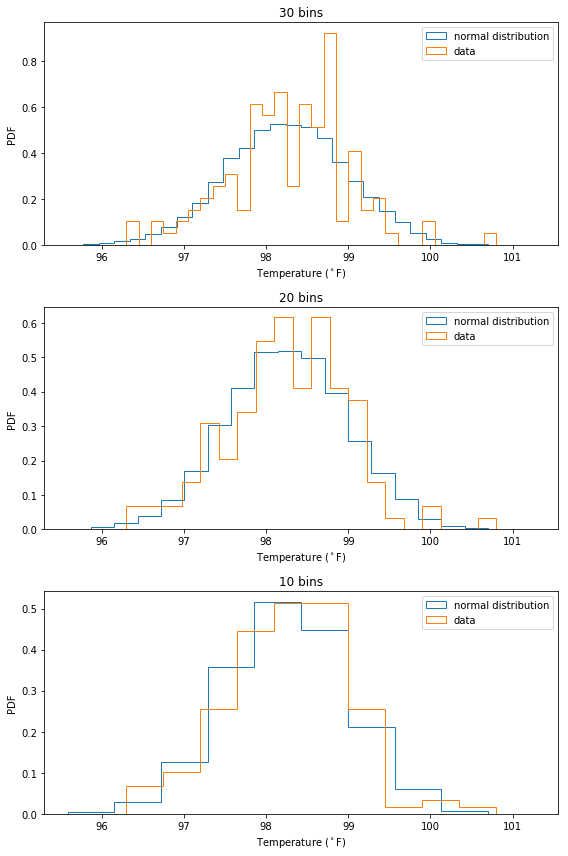

In [7]:
# Plot the PDFs
fig = plt.figure(figsize=(8, 12))
_ = plt.subplot(3,1,1)
_ = plt.hist(samples_normal, bins=30, normed=True, histtype='step')
_ = plt.hist(df['temperature'], bins=30, normed=True, histtype='step')
_ = plt.xlabel('Temperature ($^\circ$F)')
_ = plt.ylabel('PDF')
_ = plt.title('30 bins')
_ = plt.legend(('normal distribution', 'data'))

_ = plt.subplot(3,1,2)
_ = plt.hist(samples_normal, bins=20, normed=True, histtype='step')
_ = plt.hist(df['temperature'], bins=20, normed=True, histtype='step')
_ = plt.xlabel('Temperature ($^\circ$F)')
_ = plt.ylabel('PDF')
_ = plt.title('20 bins')
_ = plt.legend(('normal distribution', 'data'))

_ = plt.subplot(3,1,3)
_ = plt.hist(samples_normal, bins=10, normed=True, histtype='step')
_ = plt.hist(df['temperature'], bins=10, normed=True, histtype='step')
_ = plt.xlabel('Temperature ($^\circ$F)')
_ = plt.ylabel('PDF')
_ = plt.title('10 bins')
_ = plt.legend(('normal distribution', 'data'))
_ = plt.tight_layout()


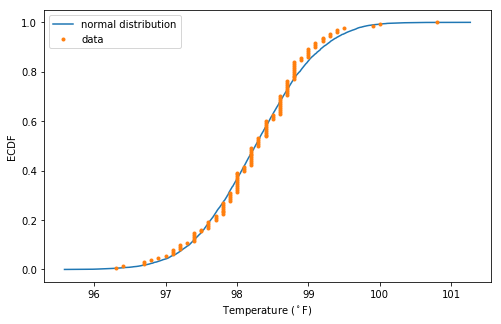

In [8]:
# Plot the ECDFs
fig = plt.figure(figsize=(8, 5))
_ = plt.plot(x_normal, y_normal)
_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none')
_ = plt.ylabel('ECDF')
_ = plt.xlabel('Temperature ($^\circ$F)')
_ = plt.legend(('normal distribution', 'data'))


From the PDFs above one can see that the human body temperatures are in fact normally distributed. This fact is most evident in the PDFs created using 10 and 20 bins. The ECDFs further confirm that the data are normally distributed.

### 2.  Is the sample size large? Are the observations independent? 
*Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.*

The sample size, *n* = 130, is large (*n* > 30). 

Yes, the observations are independent because each observation is taken from a different person and the temperature of one subject is not influenced by the temperature of another subject. 

### 3. Is the true population mean 98.6 $^\circ$F? 
*Would you use a one-sample or two-sample test? Why? In this situation, is it appropriate to use the $t$ or $z$ statistic? Now try using the other test. How is the result be different? Why?*

I would use a one-sample test because we have one set of data which we are comparing to a single value. 

We have a large sample size but we do not know the population standard deviation, therefore in this situation it is appropriate to use the $t$-statistic.

In [9]:
# Null hypothesis: The true population mean is equal to the conventional mean,  98.6 deg F. 
# Test statistic: t-statistic

# Shift the data so the mean is equal to the the conventional mean
mu = 98.6
temp_shifted = df['temperature'] - x_bar + mu


# Define test statistic function
def t_stat(data, mu=98.6):
    """Calculate t-statistic"""
    return (np.mean(data) - mu) / (np.std(data) / np.sqrt(len(data)))


# Compute test statistic for data
t_obs = t_stat(df['temperature'], mu)


# Define bootstrapping functions
def bootstrap_replicate_1d(data, func):
    """Draw one bootstrap replicate for a 1-d array of data"""
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw (size) number of bootstrap replicates."""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates


# Simulate data acquisition under the null hypothesis by bootstrapping the shifted data
bs_t_reps = draw_bs_reps(temp_shifted, t_stat, size=10000)


# Compute the p-value
p_t_value = np.sum(np.abs(bs_t_reps) >= np.abs(t_obs)) / len(bs_t_reps)


print('t-statistic for the observations:', t_obs)
print('p-value: {:.2e}'.format(p_t_value))

t-statistic for the observations: -5.47592520208
p-value: 0.00e+00


The $t$-statistic = -5.476. The *p*-value = 0, indicating that in 10,000 trials, not a single trial produced a sample mean as extreme as our observed sample mean. Therefore, we must reject the null hypothesis and conclude that the true population mean is *not* 98.6$^\circ$F. 

In [10]:
# Repeat bootstrapping, but this time use z-statistic

# Define z-statistic function
def z_stat(data, mu=98.6, sigma=0.7303577789050377):
    """Calculate z-statistic"""
    return (np.mean(data) - mu) / (sigma / np.sqrt(len(data)))


# Compute test statistic for data
z_obs = z_stat(df['temperature'], mu) 


# Simulate data acquisition under the null hypothesis by bootstrapping the shifted data
bs_z_reps = draw_bs_reps(temp_shifted, z_stat, size=10000)


# Compute the p-value
p_z_value = np.sum(np.abs(bs_z_reps) >= np.abs(z_obs)) / len(bs_z_reps)


print('z-statistic for the observations:', z_obs)
print('p-value: {:.2e}'.format(p_z_value))


z-statistic for the observations: -5.47592520208
p-value: 0.00e+00


The $z$-statistic has the same value as the $t$-statistic. This result is expected because the population standard deviation is still unknown which means we must use the sample standard deviation as an approximation of the population standard deviation in our $z$-statistic computation. It is also expected because we have a large sample size and as *n* increases, the $t$-statistic approaches the $z$-statistic. 

###   4. Draw a small sample of size 10 from the data and repeat both tests. 
*Which one is the correct one to use? What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?*

In [11]:
# Draw 10 samples from the data
sample = np.random.choice(df['temperature'], size=10)


# Shift the data 
sample_shifted = sample - np.mean(sample) + mu


# Compute t-statistic
t_obs2 = t_stat(sample)
# Draw bootstrap reps
bs_t_reps2 = draw_bs_reps(sample_shifted, t_stat, size=10000)
# Compute the p-value
p_t_value2 = np.sum(np.abs(bs_t_reps2) >= np.abs(t_obs2)) / len(bs_t_reps2)

print('t-statistic for n=10:', t_obs2)
print('p-value: {:.2e}'.format(p_t_value2))
print('')


# Compute z-statistic
z_obs2 = z_stat(sample)
# Draw bootstrap reps
bs_z_reps2 = draw_bs_reps(sample_shifted, z_stat, size=10000)
# Compute the p-value
p_z_value2 = np.sum(np.abs(bs_z_reps2) >= np.abs(z_obs2)) / len(bs_z_reps2)

print('z-statistic for n=10:', z_obs2)
print('p-value: {:.2e}'.format(p_z_value2))


t-statistic for n=10: -3.64430281749
p-value: 5.70e-03

z-statistic for n=10: -2.25147787945
p-value: 4.00e-04


For *n* = 10, we should use the *t*-statistic.

We notice that the *p* values differ markedly between the two tests. This re-affirms the point that even though the $t$ and $z$ statistic can both be appropriate for large sample sizes, the only appropriate test for small sample sizes is the $t$-statistic.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
*Start by computing the margin of error and confidence interval.*

In [12]:
# Margin of Error
critical_z = 1.96 # z-value corresponding to 95% confidence interval
standard_e = s/np.sqrt(n)
margin_e = critical_z * standard_e 
print('The margin of error on the mean temperature is: ', margin_e, 'deg. F')


# 95% Confidence Interval on the mean 
confidence_i = np.percentile(df['temperature'], [2.5, 97.5])
print('95% of the data fall between: ', confidence_i[0], ' - ', confidence_i[1], 'deg. F')


# 95% Prediction Interval
prediction_i = critical_z * s/np.sqrt(1)  
print('The 95% prediction interval is: ', x_bar-prediction_i, ' - ', x_bar+prediction_i, 'deg. F')


The margin of error on the mean temperature is:  0.125550964803 deg. F
95% of the data fall between:  96.7225  -  99.4775 deg. F
The 95% prediction interval is:  96.8177295226  -  99.6807320159 deg. F


We should consider a person's temperature to be abnormal if it falls outside of the 95% prediction interval,  96.8 - 99.7 $^{\circ}$F

### 6. Is there a significant difference between males and females in normal temperature?
*What test did you use and why? Write a story with your conclusion in the context of the original problem.*

FEMALES


count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

MALES


count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

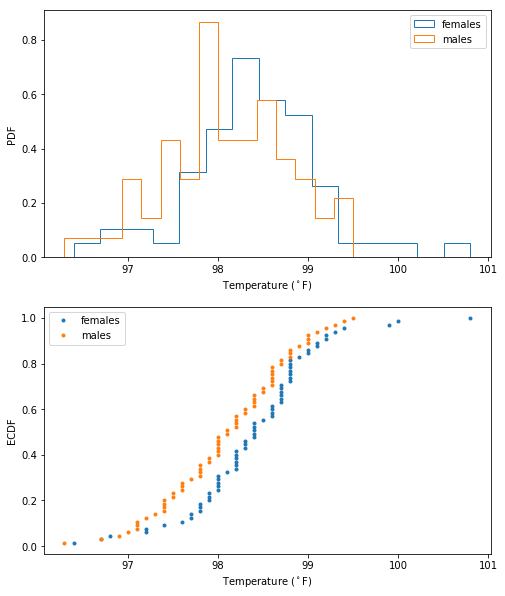

In [13]:
# Separate observations by gender
females = df[df['gender'] == 'F']
males = df[df['gender'] == 'M']

# Descriptive statistics 
print('FEMALES')
females['temperature'].describe()
print('MALES')
males['temperature'].describe()
f_mean = np.mean(females['temperature'])
m_mean = np.mean(males['temperature'])
# print('Mean female temperature: ', f_mean, 'deg. F (n =', len(females), ')')
# print('Mean male temperature: ', m_mean, 'deg. F (n =', len(males), ')')


# Compute ecdfs
x_female, y_female = ecdf(females['temperature'])
x_male, y_male = ecdf(males['temperature'])

# Examine differences visually
fig = plt.figure(figsize=(8, 10))
_ = plt.subplot(2,1,1)
_ = plt.hist(females['temperature'], bins=15, normed=True, histtype='step')
_ = plt.hist(males['temperature'], bins=15, normed=True, histtype='step')
_ = plt.xlabel('Temperature ($^\circ$F)')
_ = plt.ylabel('PDF')
_ = plt.legend(('females', 'males'))

_ = plt.subplot(2,1,2)
_ = plt.plot(x_female, y_female, marker='.', linestyle='none')
_ = plt.plot(x_male, y_male, marker='.', linestyle='none')
_ = plt.ylabel('ECDF')
_ = plt.xlabel('Temperature ($^\circ$F)')
_ = plt.legend(('females', 'males'))


Visual EDA reveals a difference in the distribution of female and male temperatures with female temperatures skewing higher and male temperatures skewing lower. Statistical EDA further bears this out, giving a mean female temperature of 98.4$^{\circ}$F and a mean male temperature of 98.1$^{\circ}$F. 

We will use a permutation test because permutation testing is a good way to simulate the hypothesis that two variables have identical probability distributions. 

In [14]:
# Null hypothesis: The distributions of temperatures for males and females are identical.
# Define test statistic 
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    return np.mean(data_1) - np.mean(data_2)


# Compute test statistic for observed data
diff_obs = diff_of_means(females['temperature'], males['temperature'])


# Draw permutation replicates
perm_replicates = np.empty(10000)
for i in range(len(perm_replicates)): 
    # Permute the data
    both = np.concatenate((females['temperature'], males['temperature']))
    both_perm = np.random.permutation(both)
    perm_females = both_perm[:len(females)]
    perm_males = both_perm[len(females):]
    #Draw replicates
    perm_replicates[i] = diff_of_means(perm_females, perm_males)


# Compute the p-value
p_value = np.sum(abs(perm_replicates) >= abs(diff_obs)) / len(perm_replicates)

print('observed difference:',diff_obs, 'deg. F' )
print('p-value:',p_value)


observed difference: 0.289230769230727 deg. F
p-value: 0.0252


Since our *p*-value is less than 0.05, we reject the null hypothesis. There is a statistically significant difference between the distribution of male and female temperatures, and hence the normal male and female temperatures are also different by a statistically significant amount. 

In 1868, Carl Wunderlich reported the normal human body temperature to be 98.6$^{\circ}$F. This value has been accepted for  more than 120 years. However, our analysis indicates that this value is not statistically accurate. Instead, we find the mean human body temperature to be 98.2 +/- 0.13$^{\circ}$F (to a 95% confidence interval). Additionally, we discovered a statistically significant difference between male and female temperatures of approximately 0.29$^{\circ}$F. Females tend to have warmer body temperatures and males tend to have cooler body temperatures.